# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['mount isa', 'poplar bluff', 'bluff', 'maragogi', 'dikson', 'mataura', 'bambanglipuro', 'east london', 'rikitea', 'puerto ayora', 'zelenikovo', 'lagoa', 'thompson', 'tucupita', 'gravdal', 'srandakan', 'hithadhoo', 'zafra', 'teahupoo', 'punta arenas', 'cazaje', 'lebu', 'kapaa', 'hilo', 'nizhneyansk', 'ushuaia', 'chekalin', 'jamestown', 'saint george', 'pudozh', 'marsh harbour', 'sinzheim', 'avarua', 'sarangani', 'kahului', 'taolanaro', 'umm ruwabah', 'sorvag', 'tucurui', 'bredasdorp', 'albany', 'cape town', 'port elizabeth', 'hermanus', 'yellowknife', 'khatanga', 'lucapa', 'vaini', 'ijaki', 'kimberley', 'evanton', 'grand river south east', 'abalak', 'carahue', 'beira', 'mogadishu', 'otavi', 'steinau', 'broome', 'lompoc', 'illoqqortoormiut', 'sitka', 'barranca', 'souillac', 'saleaula', 'vila', 'amderma', 'ancud', 'atuona', 'kawalu', 'sapucai', 'huarmey', 'port alfred', 'korla', 'les cayes', 'folkestone', 'totton', 'tommot', 'gigmoto', 'atar', 'beaverlodge', 'castro', 'saldanha', 'bambou

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [88]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []
keptCities = []
cityNum = 0

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url).json()
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        keptCities.append(city)
        print(f"Processing record {cityNum} | {city}")
        cityNum += 1
    except:
        print("City not found. Skipping...")
        pass
    

Processing record 0 | mount isa
Processing record 1 | poplar bluff
Processing record 2 | bluff
Processing record 3 | maragogi
Processing record 4 | dikson
Processing record 5 | mataura
Processing record 6 | bambanglipuro
Processing record 7 | east london
Processing record 8 | rikitea
Processing record 9 | puerto ayora
Processing record 10 | zelenikovo
Processing record 11 | lagoa
Processing record 12 | thompson
Processing record 13 | tucupita
Processing record 14 | gravdal
Processing record 15 | srandakan
Processing record 16 | hithadhoo
Processing record 17 | zafra
Processing record 18 | teahupoo
Processing record 19 | punta arenas
City not found. Skipping...
Processing record 20 | lebu
Processing record 21 | kapaa
Processing record 22 | hilo
City not found. Skipping...
Processing record 23 | ushuaia
Processing record 24 | chekalin
Processing record 25 | jamestown
Processing record 26 | saint george
Processing record 27 | pudozh
Processing record 28 | marsh harbour
Processing record 2

Processing record 230 | port hardy
Processing record 231 | rafai
Processing record 232 | leningradskiy
Processing record 233 | altay
Processing record 234 | batagay
Processing record 235 | kanash
Processing record 236 | fairbanks
Processing record 237 | shellbrook
Processing record 238 | port augusta
Processing record 239 | alamos
Processing record 240 | yendi
Processing record 241 | santa maria
Processing record 242 | haines junction
Processing record 243 | kaitangata
Processing record 244 | banyo
Processing record 245 | pisco
Processing record 246 | honiara
Processing record 247 | keokuk
Processing record 248 | meadow lake
Processing record 249 | hobart
Processing record 250 | naze
Processing record 251 | santa vitoria
Processing record 252 | abu zabad
Processing record 253 | moree
Processing record 254 | vieques
Processing record 255 | buritis
Processing record 256 | yabelo
Processing record 257 | makaha
Processing record 258 | suicheng
Processing record 259 | esperance
Processing r

Processing record 466 | jalu
Processing record 467 | aykhal
Processing record 468 | port-gentil
Processing record 469 | marabba
Processing record 470 | auki
City not found. Skipping...
Processing record 471 | kulhudhuffushi
Processing record 472 | baruun-urt
Processing record 473 | smidovich
Processing record 474 | ixtapa
Processing record 475 | yumen
Processing record 476 | kanlagay
City not found. Skipping...
Processing record 477 | ambilobe
Processing record 478 | vagur
Processing record 479 | tomatlan
Processing record 480 | kilindoni
City not found. Skipping...
Processing record 481 | wahiawa
Processing record 482 | halifax
Processing record 483 | batemans bay
Processing record 484 | harper
Processing record 485 | concepcion
Processing record 486 | ostersund
Processing record 487 | talara
Processing record 488 | sioux lookout
Processing record 489 | kloulklubed
City not found. Skipping...
Processing record 490 | minuri
City not found. Skipping...
Processing record 491 | ahipara
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weather_df = pd.DataFrame({
    'City': keptCities,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': maxTemp,
    'Wind Speed': windSpeed
})

weather_df.count()

City          593
Cloudiness    593
Country       593
Date          593
Humidity      593
Lat           593
Lng           593
Max Temp      593
Wind Speed    593
dtype: int64

In [56]:
weather_df.to_csv('Weather_API_Output')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mount isa,26,AU,1592287602,30,-20.73,139.50,300.15,4.60
1,poplar bluff,1,US,1592287602,88,36.76,-90.39,290.37,2.03
2,bluff,89,NZ,1592287602,80,-46.60,168.33,285.68,6.05
3,maragogi,55,BR,1592287602,84,-9.01,-35.22,297.64,6.02
4,dikson,31,RU,1592287603,98,73.51,80.55,273.55,5.52


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

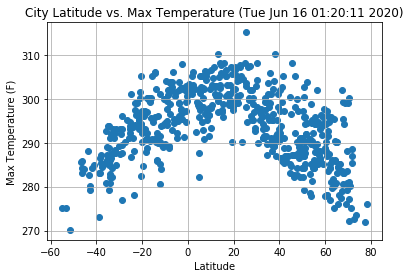

In [29]:
localtime = time.asctime( time.localtime(time.time()) )
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.title(f'City Latitude vs. Max Temperature ({localtime})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#### Latitude vs. Temperature Plot

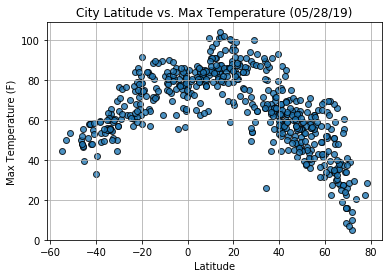

(0, 200)

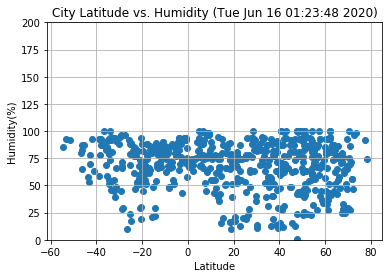

In [33]:
localtime = time.asctime( time.localtime(time.time()) )
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title(f'City Latitude vs. Humidity ({localtime})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.ylim(0, 200)

#### Latitude vs. Humidity Plot

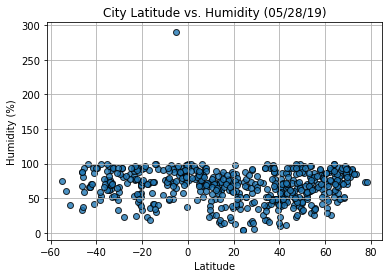

Text(0, 0.5, 'Cloudiness (%)')

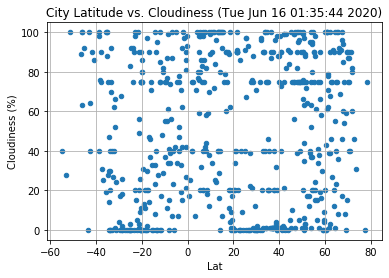

In [54]:
localtime = time.asctime( time.localtime(time.time()) )
cloud_plot = weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, title=f"City Latitude vs. Cloudiness ({localtime})")
cloud_plot.set_ylabel('Cloudiness (%)')

#### Latitude vs. Cloudiness Plot

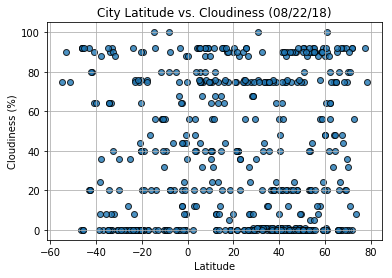

Text(0, 0.5, 'Wind Speed (mph)')

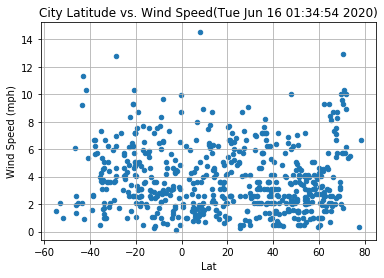

In [53]:
localtime = time.asctime( time.localtime(time.time()) )
wind_plot = weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, title=f"City Latitude vs. Wind Speed({localtime})")
wind_plot.set_ylabel("Wind Speed (mph)")

#### Latitude vs. Wind Speed Plot

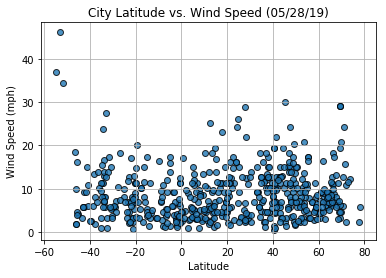

## Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

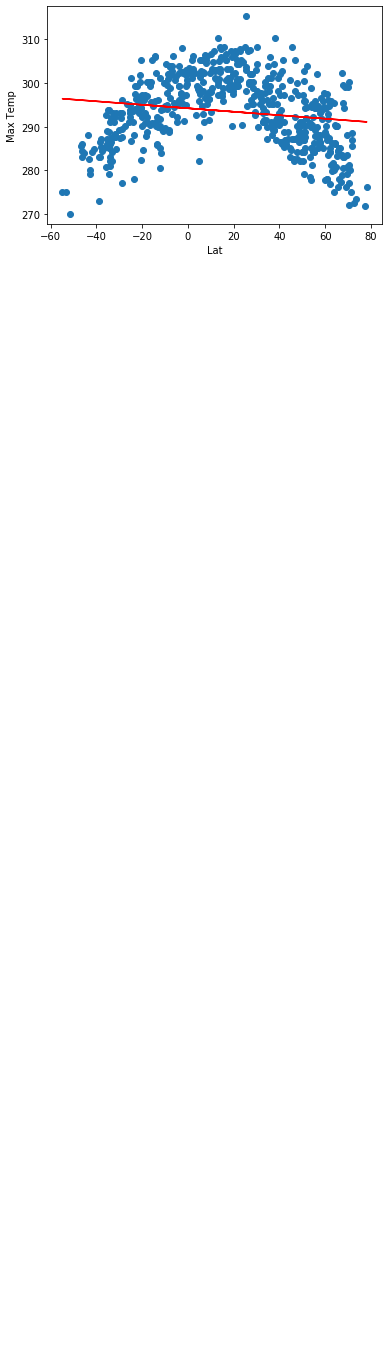

In [74]:
# OPTIONAL: Create a function to create Linear Regression plots
def do_linear_regression(df, kind, x, y):
    #graph = df.plot(kind=kind, x=x, y=y)
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

do_linear_regression(weather_df, 'scatter', 'Lat', 'Max Temp')

In [76]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Lat']>=0]
southern_df = weather_df.loc[weather_df['Lat']<0]

City          394
Cloudiness    394
Country       394
Date          394
Humidity      394
Lat           394
Lng           394
Max Temp      394
Wind Speed    394
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

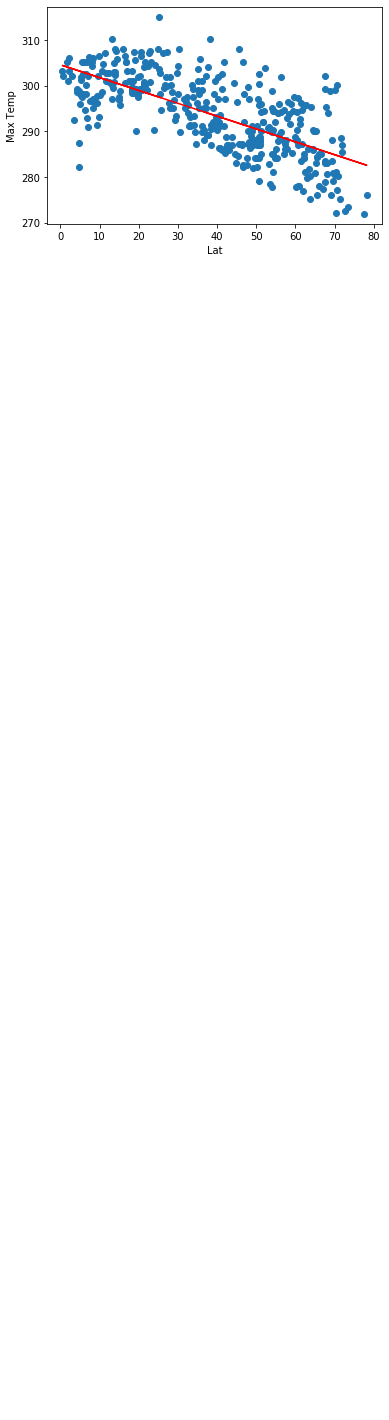

In [77]:
do_linear_regression(northern_df, 'scatter', 'Lat', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

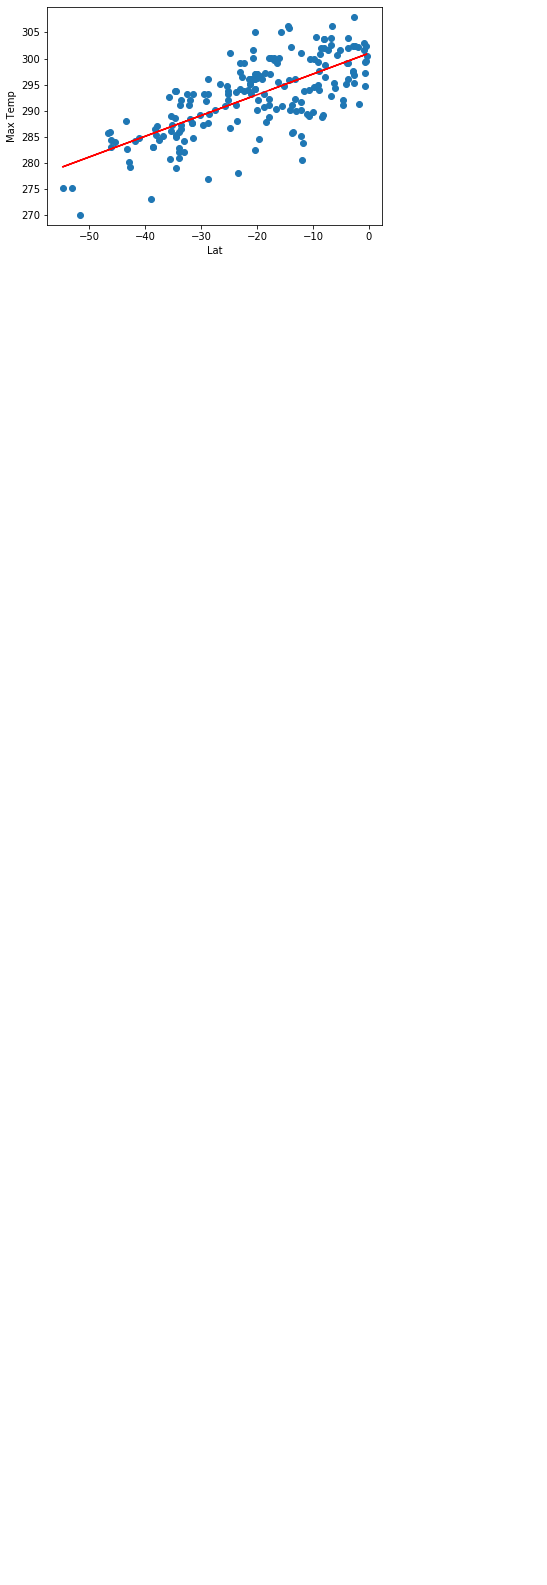

In [78]:
do_linear_regression(southern_df, 'scatter', 'Lat', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

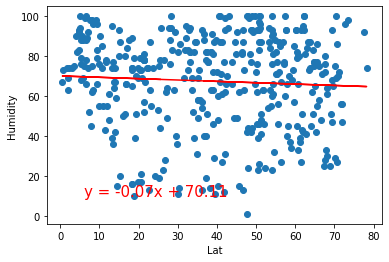

In [79]:
do_linear_regression(northern_df, 'scatter', 'Lat', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

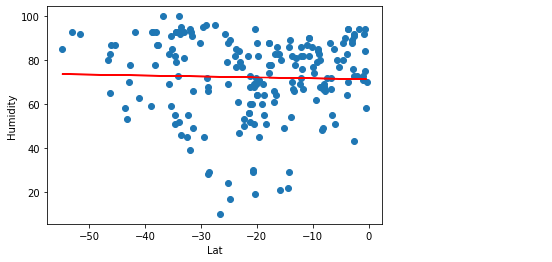

In [81]:
do_linear_regression(southern_df, 'scatter', 'Lat', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

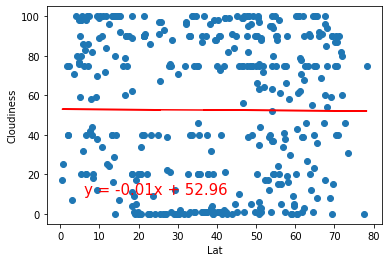

In [82]:
do_linear_regression(northern_df, 'scatter', 'Lat', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

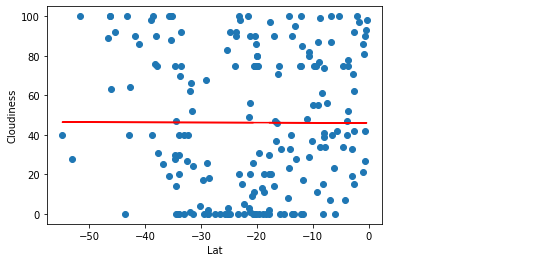

In [83]:
do_linear_regression(southern_df, 'scatter', 'Lat', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

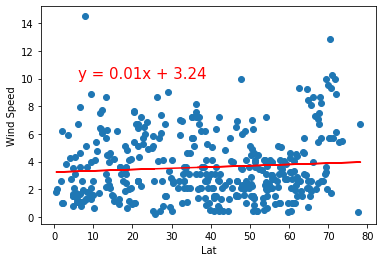

In [84]:
do_linear_regression(northern_df, 'scatter', 'Lat', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<module 'matplotlib.pyplot' from '/Users/brendanlegas/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

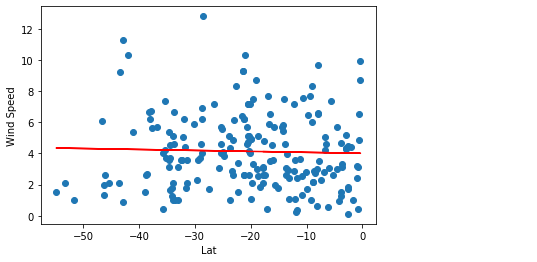

In [87]:
do_linear_regression(southern_df, 'scatter', 'Lat', 'Wind Speed')